In [1]:
import city_class_wiebe
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from itertools import chain
from numba import jit,prange,autojit

positie: (5, 5)
class <class 'city_class_wiebe.Housing'>


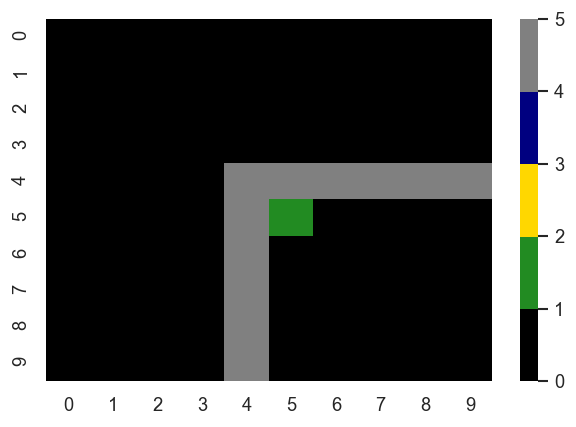

In [2]:
def plot_grid(city):
    cmap = sns.color_palette(["black", "forestgreen", "gold", "navy", "grey"])
    activity_grid = np.array([obj.value for row in city.grid for obj in row]).reshape(city.n,city.n)
    fig = plt.figure(dpi=120)
    sns.heatmap(activity_grid, cmap=cmap)
    plt.show()
#         fig.savefig(\"first_model_t={}.jpg\".format((i+1)*10))
np.random.seed(90)
city = city_class_wiebe.City(n=10)
plot_grid(city)

In [3]:
def time(city):
    for i in range(1):
        for _ in range(1):
            city.step()
        plot_grid(city)

before []
after: []


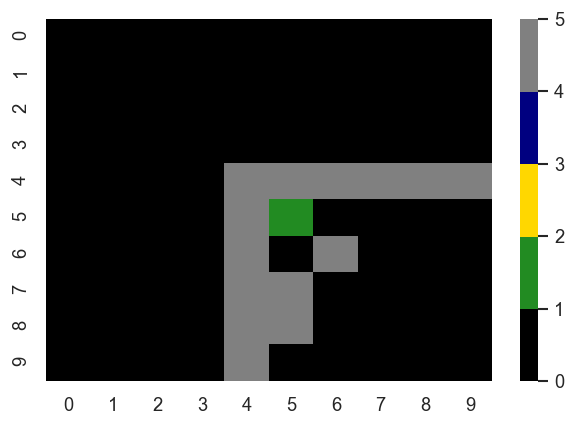

In [4]:
time(city)

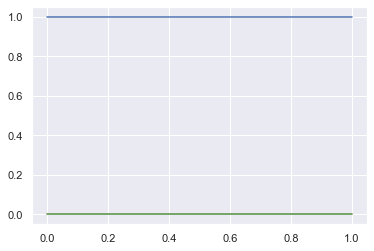

In [6]:
for activity in city.activities:
    plt.plot(activity)

In [9]:
l = [1,2,3,4,5]
a = []
for i in l:
    if i == 1:
        l.remove(i)
    a += [i]

In [10]:
a

[1, 3, 4, 5]